In [2]:
import matplotlib.pyplot as plt 
import random
import numpy as np

plt.style.use('seaborn-whitegrid')

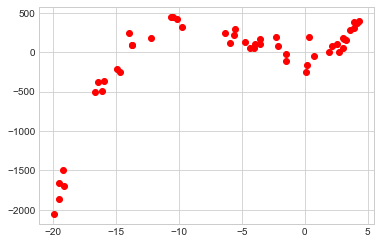

In [3]:
noise_scale = 100 
number_of_samples = 50 
x = np.array(25*(np.random.rand(number_of_samples) - 0.8))
x.sort()
yNoisy = np.array(7 * x + 15 * x**2 + 1 * x**3 + noise_scale*np.random.randn(number_of_samples) )
plt.plot(x,yNoisy,'ro')

In [8]:
def mse(true, pred):
    return ((((true-pred)**2)/len(pred)).mean())

def predict(factors, x):
    return factors[0]*(x**3) + factors[1]*(x**2) + factors[2]*(x) + factors[3]

def get_err(population: list):
    L = []
    for alg in population:
        hold = 0
        for inp in x:
            hold += mse(predict(alg, inp), yNoisy)
        L += [hold]
    return L


In [136]:
mutation_rate = 0.15
mutation_amount = 0.005
crossover_rate = 0.5
num_epochs = 21

population = np.random.rand(100, 4)*40

def trainstep(pop):
    err = get_err(pop)
    largest_error = sorted(err)[10]
    best_err = [i <= largest_error for i in err]
    new_pop = [pop[ind] for ind in range(len(pop)) if best_err[ind]]
    
    while(len(new_pop) < 100):
        p1 = new_pop[random.randint(0,9)]
        p2 = new_pop[random.randint(0,9)]
        child = []
        
        for i in range(len(p1)):
            hold = p1[i]
            if(crossover_rate > random.uniform(0,1)):
                hold = (hold + p2[i])/2
            if(mutation_rate > random.uniform(0,1)):
                hold += random.uniform(-mutation_amount,mutation_amount)
            child += [hold]
        new_pop = np.append(new_pop, [child], axis=0)
    return np.array(new_pop)
            
def train(pop):
    for i in range(num_epochs):
        pop = trainstep(pop)
    error = get_err(pop)    
    return pop[0]

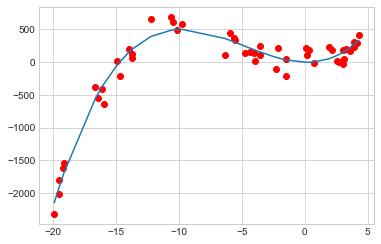

In [142]:
ns = [150]
deg=3

for i in range(len(ns)):
    
    y_noise_fit = []
    
    for j in range(number_of_samples):
        y_noise = np.array(7 * x + 15 * x**2 + 1 * x**3 + ns[i]*np.random.randn(number_of_samples))
        
    fit_noise = np.polyfit(x,y_noise,deg)
    
    for k in range(number_of_samples):
        hold = 0
        for n in range(len(fit_noise)):
            hold += fit_noise[n] * (x[k]**(len(fit_noise)-1-n))
        y_noise_fit = y_noise_fit + [hold]
    
    plt.plot(x, y_noise,'ro')
    plt.plot(x, y_noise_fit)

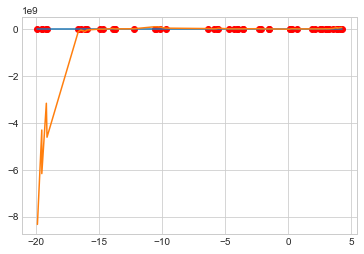

In [167]:
func = np.polyfit(x,yNoisy,deg)
y_noise_fit = []
for k in range(len(x)):
    hold = 0
    for n in range(len(func)):
        hold += func[n] * (x[k]**(len(func)-1-n))
    y_noise_fit += [hold]

plt.plot(x,yNoisy,'ro',x,predict(train(population),x),x,y_noise_fit)